<a href="https://colab.research.google.com/github/Pamplona-C/Notebooks/blob/master/Inicia%C3%A7%C3%A3oCIent%C3%ADfica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Tarefas
1.   Implementar algoritmo RandomForest





*   Link repositório Pytorch redes neurais e demais.
```
 https://github.com/deeplearningzerotoall/PyTorch/blob/master/README.md
```



In [ ]:
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
import matplotlib.pyplot as plt
from sklearn.preprocessing import  LabelEncoder
from plotly.offline import init_notebook_mode,iplot


Convertendo a base de dados para um dataframe. E posteriormente Imprimindo

In [ ]:
df = pd.read_csv('drive/MyDrive/Datasets/Brazilian/houses_to_rent_v2.csv')
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


A parte do código abaixo analisa a base de dados e faz uma contagem de valores nulos nas colunas da base de dados.

In [ ]:
df.isna()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,False,False,False,False,False,False,False,False,False,False,False,False,False
10688,False,False,False,False,False,False,False,False,False,False,False,False,False
10689,False,False,False,False,False,False,False,False,False,False,False,False,False
10690,False,False,False,False,False,False,False,False,False,False,False,False,False


Contando os valores nulos nas colunas

In [ ]:
df.isna().sum(axis=0)

,0
city,0
area,0
rooms,0
bathroom,0
parking spaces,0
floor,0
animal,0
furniture,0
hoa (R$),0
rent amount (R$),0


Mapa de calor para mostrar onde há valores nulos no dataframe

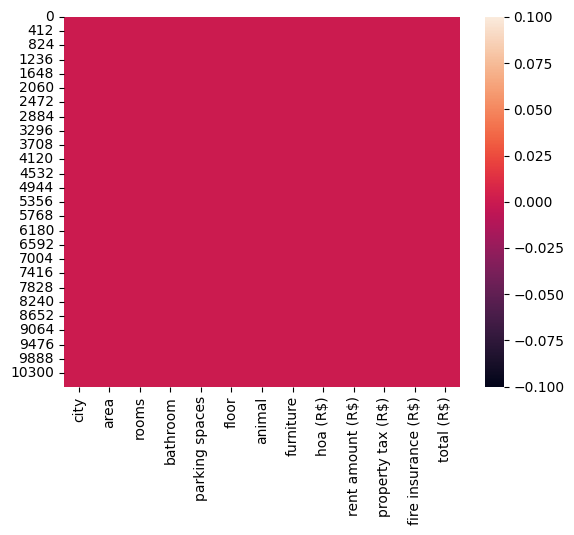

In [ ]:
sns.heatmap(df.isnull());

Como observado no mapa de calor, não há valores nulos no dataframe

Traduzindo as colunas

In [ ]:
df = df.rename(columns = {
    'parking spaces': 'vagas_garagem',
    'hoa (R$)': 'condominio',
    'rent amount (R$)': 'valor_aluguel',
    'property tax (R$)': 'iptu',
    'fire insurance (R$)': 'seguro_incendio',
    'total (R$)': 'valor_total',
    'bathroom': 'banheiro',
    'city' : 'cidade',
    'rooms': 'quartos',
    'floor': 'andar',
    'animal': 'animais_permitidos',
    'furniture': 'mobiliado',
    'hoa (R$)': 'condominio'
})


Vendo os tipos dos dados de cada coluna

In [ ]:
df.dtypes

,0
cidade,object
area,int64
quartos,int64
banheiro,int64
vagas_garagem,int64
andar,object
animais_permitidos,object
mobiliado,object
condominio,int64
valor_aluguel,int64


Traduzindo os valores das colunas do Describe

In [ ]:
temp = df.describe()

temp = temp.rename(index={
    'count': 'contagem',
    'mean': 'média',
    'std': 'desvio_padrão',
    'min': 'mínimo',
    '25%': '1º_quartil',
    '50%': 'mediana',
    '75%': '3º_quartil',
    'max': 'máximo'
})
temp.style.background_gradient(cmap='Oranges')

,area,quartos,banheiro,vagas_garagem,condominio,valor_aluguel,iptu,seguro_incendio,valor_total
contagem,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000
média,149.217920,2.506079,2.236813,1.609147,1174.021698,3896.247194,366.704358,53.300879,5490.487000
desvio_padrão,537.016942,1.171266,1.407198,1.589521,15592.305248,3408.545518,3107.832321,47.768031,16484.725912
mínimo,11.000000,1.000000,1.000000,0.000000,0.000000,450.000000,0.000000,3.000000,499.000000
1º_quartil,56.000000,2.000000,1.000000,0.000000,170.000000,1530.000000,38.000000,21.000000,2061.750000
mediana,90.000000,2.000000,2.000000,1.000000,560.000000,2661.000000,125.000000,36.000000,3581.500000
3º_quartil,182.000000,3.000000,3.000000,2.000000,1237.500000,5000.000000,375.000000,68.000000,6768.000000
máximo,46335.000000,13.000000,10.000000,12.000000,1117000.000000,45000.000000,313700.000000,677.000000,1120000.000000


Analisando o describe é possível observar que a média de valor dos aluguéis é de R$3.896,24. O valor mínimo é de R$450,00.

# Histograma
Box plot dos valores dos aluguéis

In [ ]:
# Dados em português
g0 = [go.Box(y=df.valor_aluguel, name="Valor aluguel", marker=dict(color="rgba(51,0,0,0.9)"), hoverinfo="name+y")]
# g2 = [go.Box(y=df.banheiro, name="Banheiros", marker=dict(color="rgba(0,102,102,0.9)"), hoverinfo="name+y")]
# g3 = [go.Box(y=df.vagas_garagem, name="Vagas na Garagem", marker=dict(color="rgba(9,80,58,12.2)"), hoverinfo="name+y")]

# Layout com título e eixo y traduzidos
layout2 = go.Layout(
    title="Distribuição das Casas Valor aluguel",
    yaxis=dict(title="Valor aluguel", range=[0, 13])  # Título do eixo Y traduzido
)

# Criando a figura com os dados e layout traduzidos
fig2 = go.Figure(data=g0, layout=layout2)

# Exibir o gráfico
iplot(fig2)

In [ ]:
# Dados em português
g1 = [go.Box(y=df.quartos, name="Quartos", marker=dict(color="rgba(51,0,0,0.9)"), hoverinfo="name+y")]
g2 = [go.Box(y=df.banheiro, name="Banheiros", marker=dict(color="rgba(0,102,102,0.9)"), hoverinfo="name+y")]
g3 = [go.Box(y=df.vagas_garagem, name="Vagas na Garagem", marker=dict(color="rgba(9,80,58,12.2)"), hoverinfo="name+y")]

# Layout com título e eixo y traduzidos
layout2 = go.Layout(
    title="Distribuição das Casas por Quartos, Banheiros e Vagas na Garagem",
    yaxis=dict(title="Quantidade", range=[0, 13])  # Título do eixo Y traduzido
)

# Criando a figura com os dados e layout traduzidos
fig2 = go.Figure(data=g1 + g2 + g3, layout=layout2)

# Exibir o gráfico
iplot(fig2)


In [ ]:
# g4 = [go.Box(y=df.condominio, name="condominio", marker=dict(color="rgba(51,0,0,0.9)"), hoverinfo="name+y")]
g5 = [go.Box(y=df.iptu, name="IPTU", marker=dict(color="rgba(0,102,102,0.9)"), hoverinfo="name+y")]
g6 = [go.Box(y=df.valor_total, name="valor_total", marker=dict(color="rgba(9,80,58,12.2)"), hoverinfo="name+y")]

# # Layout com título e eixo y traduzidos
layout2 = go.Layout(
    title="Distribuição das Casas por Quartos, Banheiros e Vagas na Garagem",
    yaxis=dict(title="Quantidade", range=[0, 1000])  # Título do eixo Y traduzido
)

# # Criando a figura com os dados e layout traduzidos
fig2 = go.Figure(data=g5 + g6, layout=layout2)

# # Exibir o gráfico
iplot(fig2)


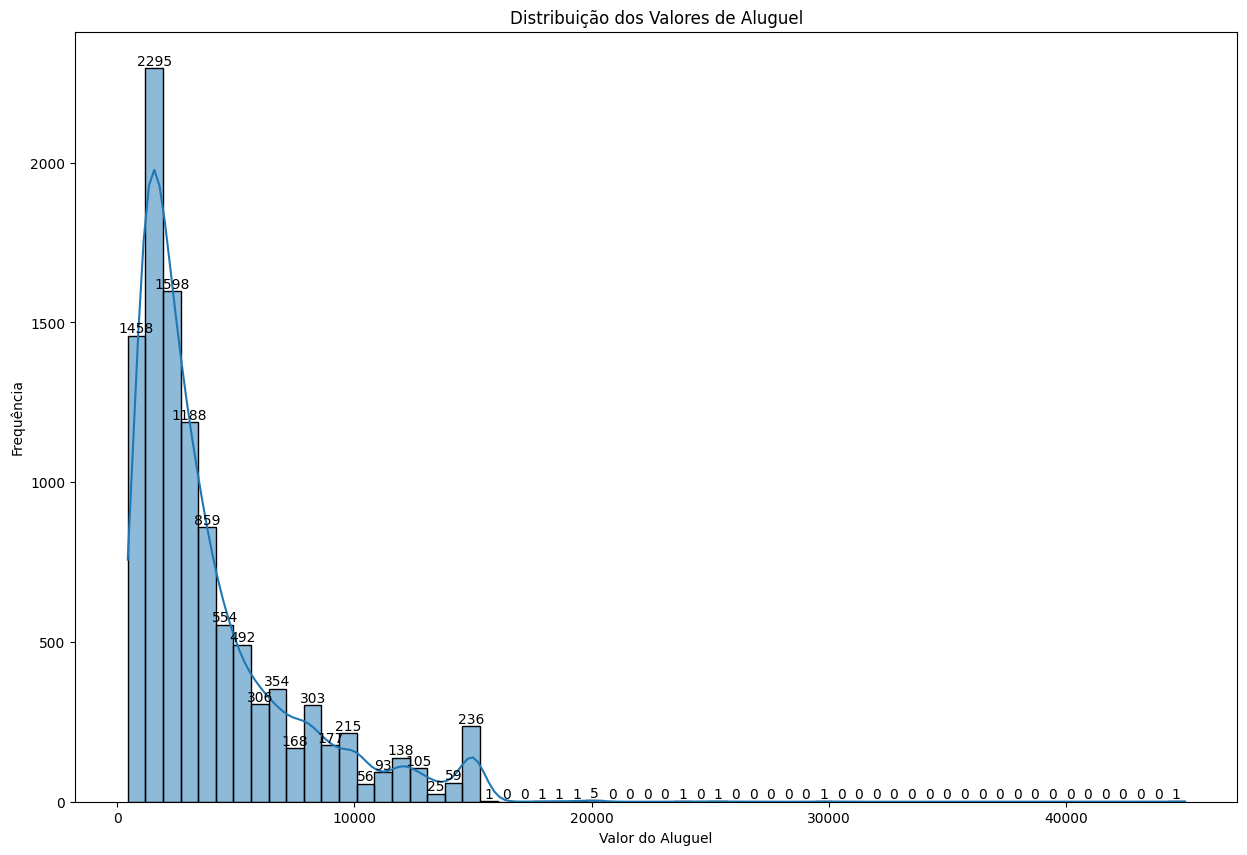

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.histplot(df['valor_aluguel'], bins=60, kde=True, edgecolor='black')

# Adiciona os valores de frequência no topo de cada barra
for p in ax.patches:
    ax.annotate(format(int(p.get_height()), 'd'),  # Valor da frequência
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posição (x, y)
                ha='center', va='bottom')  # Alinhamento horizontal e vertical

# Títulos e rótulos dos eixos
plt.title('Distribuição dos Valores de Aluguel')
plt.xlabel('Valor do Aluguel')
plt.ylabel('Frequência')
plt.show()


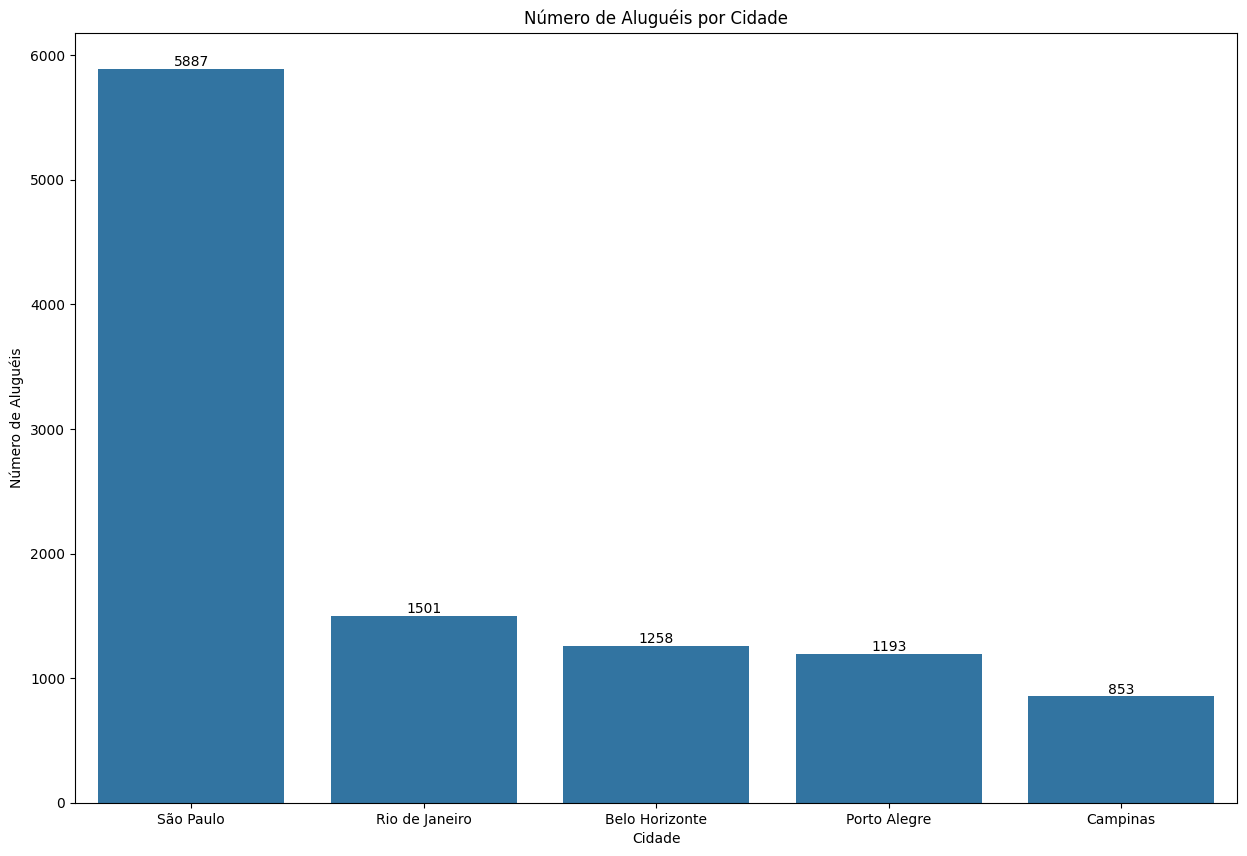

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.countplot(data=df, x='cidade', order=df['cidade'].value_counts().index)

for p in ax.patches:
    ax.annotate(format(int(p.get_height()), 'd'),  # Formata o valor como inteiro
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posição (x, y)
                ha='center', va='bottom')  # Alinhamento horizontal e vertical
plt.title('Número de Aluguéis por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Número de Aluguéis')
# plt.xticks(rotation=50)  # Rotaciona os rótulos das cidades se necessário
plt.show()
